
I also try to include the plotply graphs becasue its's nice to see numbers when you hover over the plots  

List of question that I am going to answer using data.

1.Who were the passenger,their age,Pclass,?













In [1]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame


import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [49]:
titanic_df = pd.read_csv('/home/shubham/Downloads/train.csv')
test_df = pd.read_csv('/home/shubham/Downloads/test.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Later,we have to deal with Null values in Age & Cabin 

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusion**

1.Minumum value for the age is 0.4 . Look's like there are newborns.Keep that in mind when working with ages.

2.There is huge variation in the fare column 

Describe on categorical feature 

As you can see there are few columns missing from the above table

In [6]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Theobald, Mr. Thomas Leonard",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


This really comes in handly to see check the duplicacy 

1.There are more Male on the ship.

2.Most of people embarked from the S port and there are 3 unique port.

## Who are the passenger ?

Let's differenciate them on gender basis

In [7]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

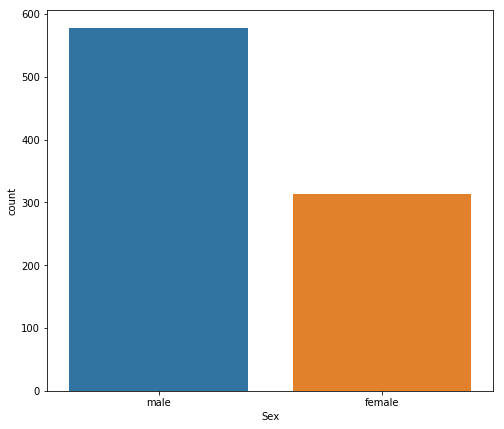

In [8]:
plt.figure(figsize=(8,7))
sns.countplot(data=titanic_df,x='Sex')

same thing using plotly

Let's see who survived

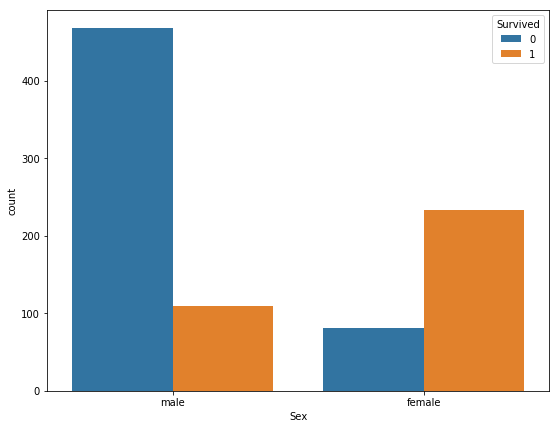

In [9]:
plt.figure(figsize=(9,7))

sns.countplot(data=titanic_df,x='Sex',hue='Survived')

So most of most the women survived.

Let's check out the average count of men & women who survived.

In [10]:
titanic_df['Survived'].groupby(titanic_df['Sex']).mean() *100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

So over 74.2% of women were saved but only 18.89% of men survived. 

It woulbe de intresting to see the number of women & men survived,

In [11]:
survived = titanic_df['Survived'].groupby(titanic_df['Sex']).value_counts().unstack()

In [12]:
survived

Survived,0,1
Sex,,
female,81,233
male,468,109


468 males out of 891 passengers that's a huge number.

## Working with Pclass 

In [13]:
# check for NULL values

sum(titanic_df['Pclass'].isnull())

0

In [14]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

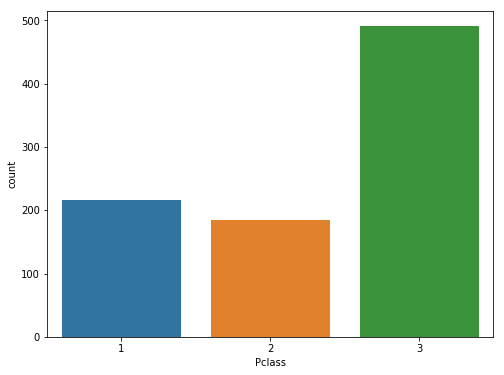

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=titanic_df,x='Pclass')

In [16]:
# Standard excel pivot style
titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts().unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


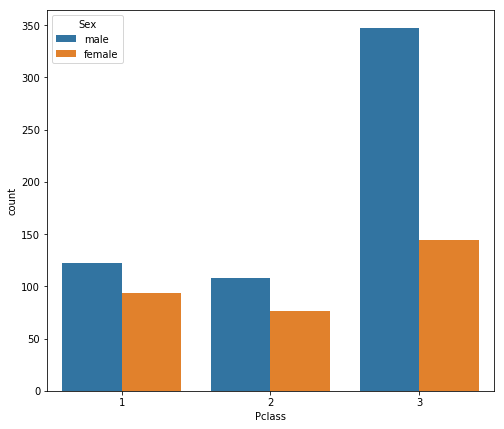

In [17]:
# let's Visualize  

plt.figure(figsize=(8,7))
sns.countplot(data=titanic_df,x='Pclass',hue='Sex')

So most of the passenger were in Pclass 3. 

If you look at the ratio of male & female in each class.

It will be intresting to see the percentage of male and female in the Pclass 3 

** Percentage of Male in Pclass**

In [18]:
(titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts().unstack()['male']/titanic_df['Pclass'].value_counts()[3]) *100

Pclass
1    24.847251
2    21.995927
3    70.672098
Name: male, dtype: float64

Wow 70% of Male are in Pclas 3. Let's check out the Female percentage 

In [19]:
(titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts().unstack()['female']/titanic_df['Pclass'].value_counts()[3]) *100

Pclass
1    19.144603
2    15.478615
3    29.327902
Name: female, dtype: float64

## Working with Age

In [20]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Remember there are few NULL values in age column**

In [21]:
# number of NULL values in age

sum(titanic_df['Age'].isnull()) 

177

As the minimum value for the age is 4 Months.It will be intresting to see how many newborn were there on the ship.

Also let's a change in the Sex column and <= 16 year as a child

In [22]:
# new borns

titanic_df[titanic_df['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [23]:
len(titanic_df[titanic_df['Age']<=16])

100

In [24]:
# Let's make function 
def isChild(df):
    if df['Age'] <=16:
        return 'child'
    else:
        return df['Sex']

In [25]:
# A new columns

titanic_df['person'] = titanic_df[['Age','Sex']].apply(isChild,axis=1)

In [26]:
titanic_df['person'].value_counts()

male      526
female    265
child     100
Name: person, dtype: int64

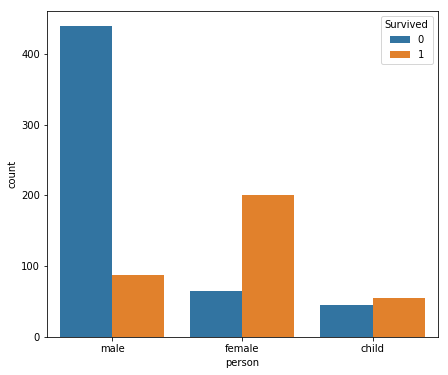

In [27]:
plt.figure(figsize=(7,6))
sns.countplot(data=titanic_df,x='person',hue='Survived')

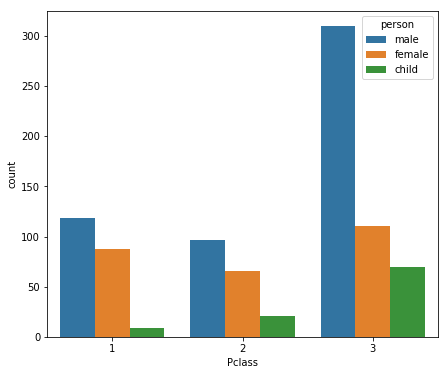

In [28]:
plt.figure(figsize=(7,6))

sns.countplot(data=titanic_df,x='Pclass',hue='person')

<Figure size 7200x5760 with 0 Axes>

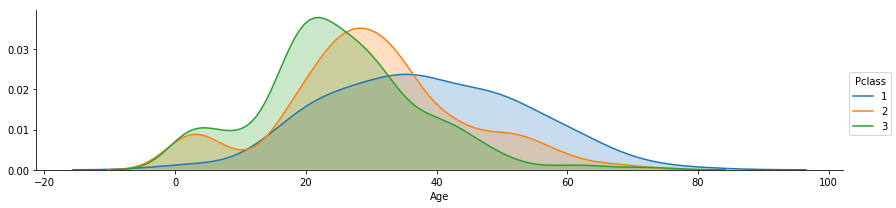

In [29]:
# Distribution of age in each Pclass 

plt.figure(figsize=(100,80))
g = sns.FacetGrid(data=titanic_df,hue='Pclass',aspect=4)
g.map(sns.kdeplot,'Age',shade=True)


g.add_legend()

In the above KDE plot it's very hard to understand the distribution of ages in each class plus there are NULL values for the 
age column as well.

It would be great to fill up those null values and divide the age into different age groups and then visualize it to get a better picture.


In [30]:
# Let's check out the head of dataframe and see to which columns is more relateable to the those the age

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We can fill the NULL values of Age column with the help of **Name** column as it also have the salutation along with the name 
of passenger.

For this to work we need to do few things

1.Check out the data in **Name** column.

2.Look for duplicasy and NULL values.

3.Create a new column and separate the salutation from the actual name.This often known as creating **new features** in data analysis.

## Creating New features

In [31]:
sum(titanic_df['Name'].isnull())

0

In [32]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.',expand=True)

In [33]:
# check if every thing works fine
titanic_df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [34]:
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Sir           1
Ms            1
Capt          1
Mme           1
Don           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

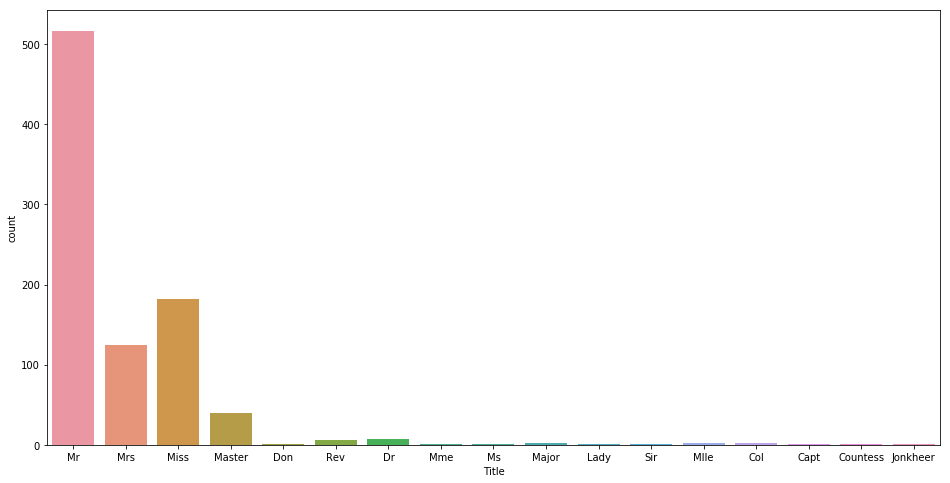

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(data=titanic_df,x='Title')

Let's assign a number for the title just like the Sex column

In [36]:
title_map = {'Mr':1,
             'Miss':2,
             'Mrs' :3,
             'Master':4,
             "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4, "Ms": 4, 
            "Lady": 4, "Jonkheer": 4,"Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4
             
            }

In [37]:
titanic_df['Title'] = titanic_df['Title'].map(title_map)

Now check the mean age in each group and with the help of these fill Null vaulue in age column

In [38]:
titanic_df[['Title','Age']].groupby('Title').mean()

,Age
Title,
1,32.368090
2,21.773973
3,35.898148
4,20.430161


Creating a fucntion

In [39]:
def compute_age(dataframe):
    Age = dataframe['Age']
    Title = dataframe['Title']
    
    if pd.isnull(Age):
        if Title == 1:
            return titanic_df['Age'][titanic_df['Title']==1].mean()
        if Title == 2:
            return titanic_df['Age'][titanic_df['Title']==2].mean()
        if Title == 3:
            return titanic_df['Age'][titanic_df['Title']==3].mean()
        if Title == 4:
            return titanic_df['Age'][titanic_df['Title']==4].mean()
        
    else:
        return Age
    
    

In [40]:
titanic_df['Age'] = titanic_df[['Age','Title']].apply(compute_age,axis=1)

In [41]:
# now check for null in age column

sum(titanic_df['Age'].isnull())

0

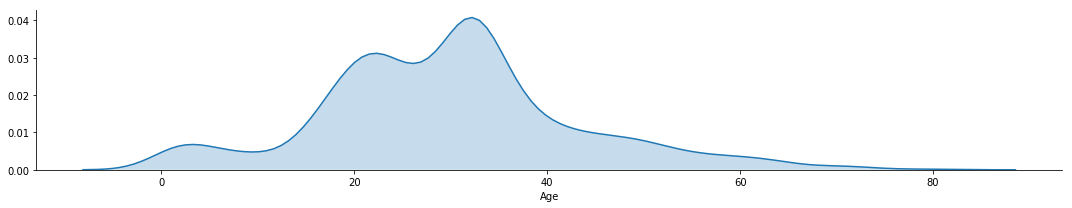

In [42]:
g=sns.FacetGrid(data=titanic_df,aspect=5)
g.map(sns.kdeplot,'Age',shade=True)

Now divide the age into group to get more clear picture and then we will visulize it.

There are couple of ways to do this but the way i like you do is make a function to create a new column and we use that column later for visualization. 

In [43]:
def age_group(age):
    if age <=16:
        return 1
    if (age > 16) & (age <=26):
        return 2
    if (age > 26) & (age <=36):
        return 3 
    if (age > 36) & (age <=46):
        return 4
    if (age > 46) & (age <=56):
        return 5
    if age > 56:
        return 6
      

In [44]:
titanic_df['Age_group'] = titanic_df['Age'].apply(age_group)

In [45]:
titanic_df['Age_group'].value_counts()

3    336
2    260
1    100
4     97
5     63
6     35
Name: Age_group, dtype: int64

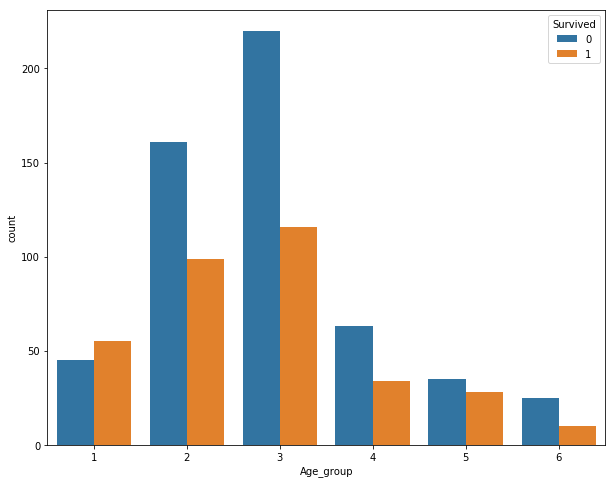

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(data=titanic_df,x='Age_group',hue='Survived')

To make stacked countplot

In [47]:
survived_num = titanic_df[titanic_df['Survived']==1]['Age_group'].value_counts()
dead_num = titanic_df[titanic_df['Survived']==0]['Age_group'].value_counts()

survived_num,dead_num

(3    116
 2     99
 1     55
 4     34
 5     28
 6     10
 Name: Age_group, dtype: int64, 3    220
 2    161
 4     63
 1     45
 5     35
 6     25
 Name: Age_group, dtype: int64)

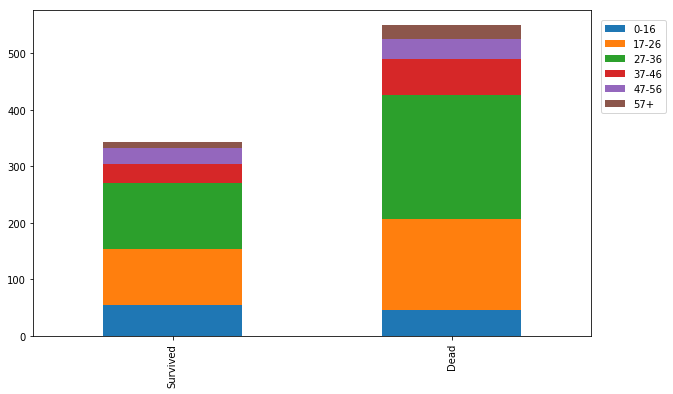

In [48]:

stacked_df = pd.DataFrame([survived_num,dead_num])

stacked_df.index = ['Survived','Dead']
stacked_df.columns = ['0-16','17-26','27-36','37-46','47-56','57+']

stacked_df.plot(kind='bar',stacked=True,figsize=(10,6))

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)
